<a href="https://colab.research.google.com/github/mouleshgs/ml/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')


/tmp/ipython-input-1-2489566458.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [2]:
data


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606550,23.866475,23.244431,23.668754,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000
...,...,...,...,...,...
2023-12-22,192.192535,193.989374,191.567111,193.761035,37149600
2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300


Text(0.5, 1.0, 'Apple Closing Prices')

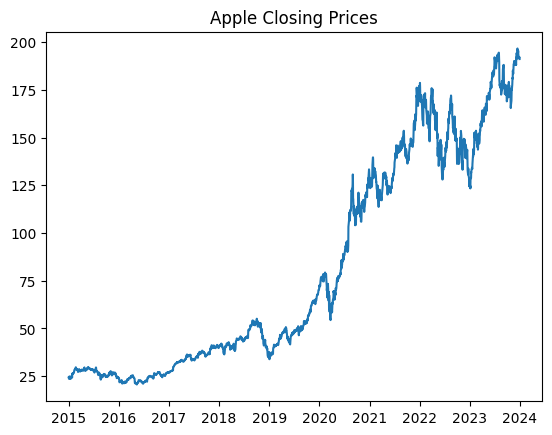

In [3]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])
plt.title("Apple Closing Prices")


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])


In [5]:
scaled_data

array([[0.02068561],
       [0.01679828],
       [0.0168109 ],
       ...,
       [0.97202656],
       [0.97445179],
       [0.96852988]])

In [6]:
import numpy as np

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 60)
X = X.reshape(X.shape[0], X.shape[1], 1)  # LSTM needs 3D input


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=20, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0547
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1705e-04
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8207e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0223e-04
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8883e-04
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4464e-04
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2034e-04
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3574e-04
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3767e-04
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5480e-04
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0730e-04
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8218e-04
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9999e-04
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7215e-04
Epoch 15/20
69/69 ━━━━━━━━━━━━━

In [8]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


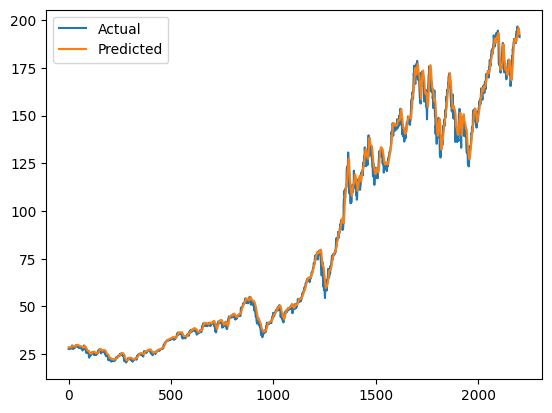

In [9]:

plt.plot(data['Close'].values[61:], label="Actual")
plt.plot(predicted, label="Predicted")
plt.legend()